In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(19680801)

mux,sdx,muy,sdy = 0,1,7,1.5

X = np.random.normal(0,1, size=100)
Y = np.random.normal(7,1.5, size=100)
ypred = [(sdy/sdx)*(x-mux)+muy for x in X]

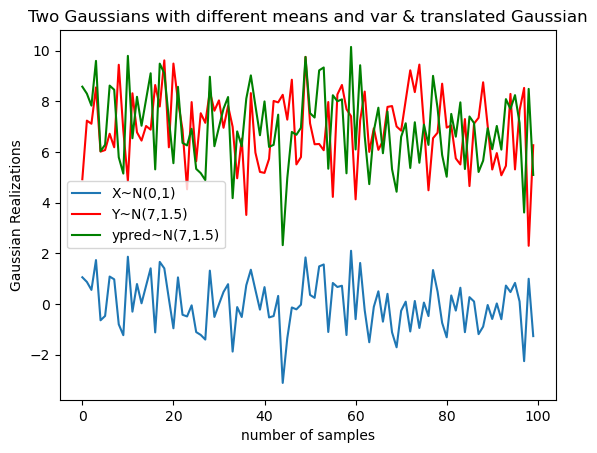

In [3]:
#OT map mapping X to Y distribution
fig, ax = plt.subplots()
ax.plot(X, label='X~N(0,1)')
ax.plot(Y, label='Y~N(7,1.5)', color='r')
ax.plot(ypred, label='ypred~N(7,1.5)', color='g')
ax.legend()
ax.set_xlabel('number of samples')
ax.set_ylabel('Gaussian Realizations')
ax.set_title('Two Gaussians with different means and var & translated Gaussian')
plt.show()

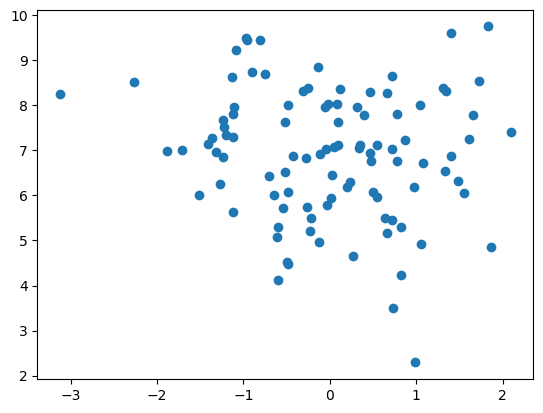

In [4]:
#OT map mapping X to Y distribution
fig, ax = plt.subplots()
ax.scatter(X, Y, label='X~N(0,1)')
plt.show()

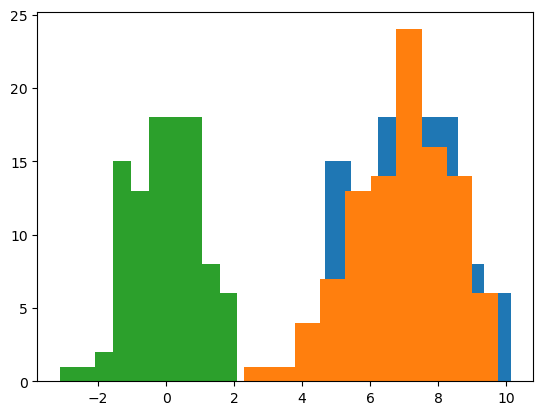

In [5]:
fig, ax = plt.subplots()
ax.hist(ypred, label='OT map')
ax.hist(Y, label='Original')
ax.hist(X)
# ax.set_xlabel('number of Gaussian samples')
# ax.set_ylabel('Gaussian realizations ~(7,1.5)')
# ax.set_title('OT map v. Original')
plt.show()

In [6]:
def wasserstein_distance(X,Y):
    Xord = np.sort(X)
    Yord = np.sort(Y)
    print((sum((Xord-Yord)**2))**.5)
    
wasserstein_distance(ypred,Y)
    

1.7979416745583112


# Consider the following simple case

Let $P_i \sim \mathcal{N}(\mu_{1i},\sigma^2)$ and $Q_i \sim \mathcal{N}(\mu_{2i},\sigma^2),$ where $ \mu_{1i} = \mu_1 + \varepsilon_i $ and  $ \mu_{2i} = \mu_2 + \varepsilon'_i,$ $\forall 1\leq i \leq n,$ and $\varepsilon_i, \varepsilon_i' \in \mathcal{N}(0,1).$  Then, the OT map, $T_i: \mathbb{R} \to \mathbb{R},$ is  $T_i(x) = (x-\mu_{1i})+\mu_{2i}.$

In [7]:
# Define parameters
n = 100  # Number of samples
k = 30   # Sample size

# Generate samples
X = np.random.normal(10, 1, size=(n, k))
Y = np.random.normal(5, 1, size=(n, k))

# Initialize parameters
loss = 0
gamma = 0
alpha = 0.01
n = len(X)

# Perform gradient descent
for _ in range(10000):
    for xi, yi in zip(X, Y):
        mu_1i = np.mean(xi)
        mu_2i = np.mean(yi)
        loss += np.sum((mu_1i - gamma - mu_2i)**2)
    
    dgamma = -2 * np.sum(mu_1i - gamma - mu_2i)
    
    gamma -= alpha * dgamma
    
print("Learned parameters:", gamma)

Learned parameters: 4.583311715116004


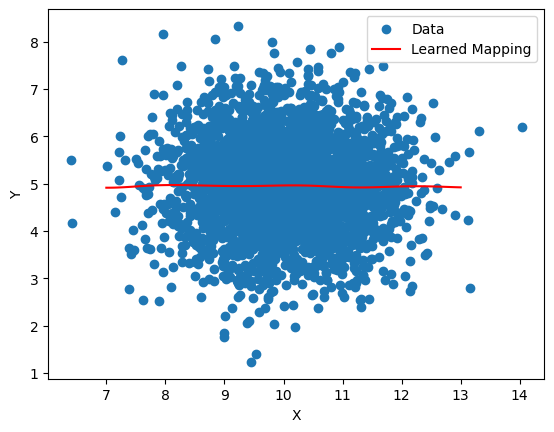

In [8]:
# Define the Gaussian kernel
def gaussian_kernel(x):
    return np.exp(-0.5 * x**2)

# Define the kernel regression function
def kernel_regression(x, X, Y, kernel, h):
    weights = kernel((x - X) / h)
    return np.sum(weights * Y) / np.sum(weights)

# Hyperparameter: bandwidth (h)
h = 0.5

# Apply kernel regression to learn the mapping
x_values = np.linspace(7, 13, 100)  # Values to predict
y_predicted = [kernel_regression(x_i, X, Y, gaussian_kernel, h) for x_i in x_values]

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Data')
plt.plot(x_values, y_predicted, color='red', label='Learned Mapping')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Why is this just a horizontal line? I thought it would have been $T(X) = X - (\mu_1 - \mu_2).$

# Consider another simple case

Let $P_i \sim \mathcal{N}(\mu_{1i},\sigma_{1i}^2)$ and $Q_i \sim \mathcal{N}(\mu_{2i},\sigma_{2i}^2),$ where $ \mu_{1i} = \mu_1 + \varepsilon_i $ and  $ \mu_{2i} = \mu_2 + \varepsilon'_i,$ $\forall 1\leq i \leq n,$ and $\varepsilon_i, \varepsilon_i' \in \mathcal{N}(0,1).$  Then, the OT map, $T_i: \mathbb{R} \to \mathbb{R},$ is  $T_i(x) = \frac{\sigma_{2i}}{\sigma_{1i}}(x-\mu_{1i})+\mu_{2i}.$

In [10]:
# Define parameters
n = 100  # Number of samples
k = 30   # Sample size

# Generate samples
X = np.random.normal(10, 1, size=(n, k))
Y = np.random.normal(5, 2, size=(n, k))

# Initialize parameters
loss = 0
gamma1 = 0
gamma2 = 0
alpha = 0.01
n = len(X)

# Perform gradient descent   
for _ in range(100):
    for xi, yi in zip(X, Y):
        mu_1i = np.mean(xi)
        mu_2i = np.mean(yi)
        sigma_1i = np.std(xi)
        sigma_2i = np.std(yi)
        loss += np.sum((gamma1*mu_1i - gamma2 - mu_2i)**2 
                       + (gamma1*sigma_1i - sigma_2i)**2)
    
    dgamma1 = 2 * np.sum(((gamma1*mu_1i - gamma2 - mu_2i)*mu_1i) 
                         + (gamma1*sigma_1i-sigma_2i)*sigma_1i)
    dgamma2 = -2 * np.sum(gamma1*mu_1i - gamma2 - mu_2i)
    
    
    gamma1 -= alpha * dgamma1
    gamma2 -= alpha * dgamma2
    
print("Learned parameters:", gamma1, gamma2)

Learned parameters: -1362119.818250433 131367.719686135


This algorithm is unstable. Why?

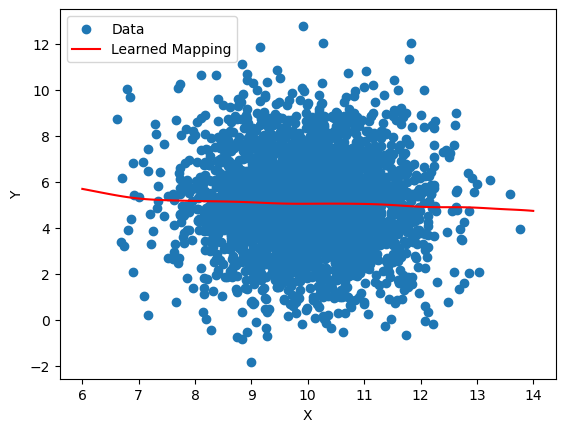

In [15]:
# Define the Gaussian kernel
def gaussian_kernel(x):
    return np.exp(-0.5 * x**2)

# Define the kernel regression function
def kernel_regression(x, X, Y, kernel, h):
    weights = kernel((x - X) / h)
    return np.sum(weights * Y) / np.sum(weights)

# Hyperparameter: bandwidth (h)
h = 0.5

# Apply kernel regression to learn the mapping
x_values = np.linspace(6, 14, 100)  # Values to predict
y_predicted = [kernel_regression(x_i, X, Y, gaussian_kernel, h) for x_i in x_values]

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Data')
plt.plot(x_values, y_predicted, color='red', label='Learned Mapping')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()